In [1]:
using GridPotentialFlow
using Plots

┌ Info: Precompiling GridPotentialFlow [1f0d46c9-1630-4f7c-9a63-ed825740f08c]
└ @ Base loading.jl:1260


In [2]:
Δx = 0.01
xlim = (-2,2)
ylim = (-2,2)
g = PhysicalGrid(xlim,ylim,Δx);

In [3]:
Rc = 1
circle = Circle(Rc,Δx)

Circular body with 628 points and radius 1.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [4]:
v = Vortex(1.5,0.0,1.0);

In [5]:
Rv = sqrt(v.x^2+v.y^2)
Vθ = -v.Γ/(2π*(Rv-Rc^2/Rv))
Tv = 2π*Rv/abs(Vθ)

49.34802200544679

In [6]:
Vθ

-0.1909859317102744

In [7]:
model = VortexModel(g,bodies=circle,vortices=[v]);

In [8]:
computevortexvelocities(model)

1 points of vector-valued Float64 data
2-element Array{Float64,1}:
 -3.584643432780199e-16
 -0.19196529044872945

In [9]:
ψ = computeψ(model);

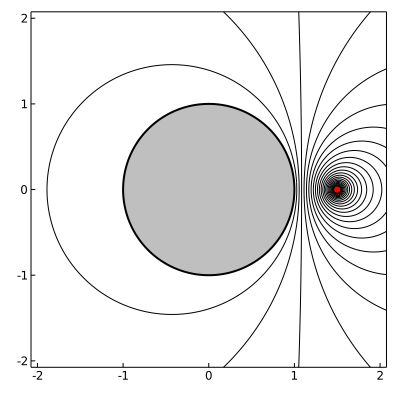

In [10]:
xg,yg = coordinates(ψ,g);
plot(circle,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])
scatter!((v->v.x).(model.vortices.list),(v->v.y).(model.vortices.list),color=:red)

In [11]:
Δt = 0.03
T = 0:Δt:Tv

0.0:0.03:49.32

In [12]:
X_hist = []

0-element Array{Any,1}

In [13]:
for t in T
    
    Ẋ = computevortexvelocities(model)
    vortices = deepcopy(model.vortices.list)
    
    X = getvortexpositions(model)
    X = X + Ẋ*Δt
    setvortexpositions!(model,X)
    
    push!(X_hist,X)
    
end

In [14]:
ψ = computeψ(model);

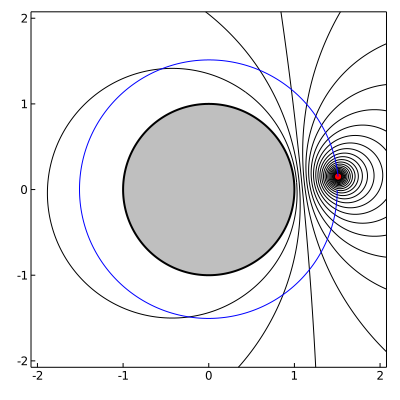

In [15]:
xg,yg = coordinates(ψ,g);
plot(circle,fillcolor=:black,fillrange=0,fillalpha=0.25,linecolor=:black,linewidth=2)
plot!(xg,yg,ψ,linecolor=:black,levels=36,size=[400,400])
scatter!((v->v.x).(model.vortices.list),(v->v.y).(model.vortices.list),color=:red)
plot!((X->X[1]).(X_hist),(X->X[2]).(X_hist),color=:blue)

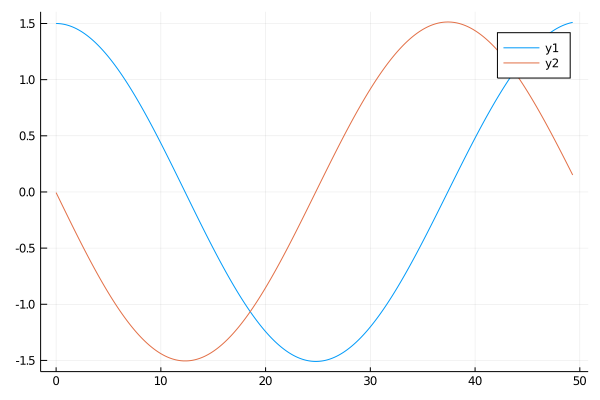

In [16]:
plot(T,(X->X[1]).(X_hist))
plot!(T,(X->X[2]).(X_hist))